In [1]:
from binance.client import Client
import pandas as pd
import time

# Initialisation du client Binance
client = Client()

# Paramètres de l'extraction
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1HOUR
start_date = '1 Jan, 2023'
end_date = '31 Dec, 2023'

# Fonction pour extraire des données historiques de Binance
def get_historical_data(symbol, interval, start_date, end_date):
    # Convertir les dates en timestamps
    start_ts = int(pd.Timestamp(start_date).timestamp() * 1000)
    end_ts = int(pd.Timestamp(end_date).timestamp() * 1000)
    klines = []

    # Télécharger les données par lots (max 1000 chandeliers par requête)
    while start_ts < end_ts:
        temp_klines = client.get_klines(
            symbol=symbol,
            interval=interval,
            limit=1000,
            startTime=start_ts
        )
        if not temp_klines:
            break
        klines.extend(temp_klines)
        start_ts = temp_klines[-1][0] + 1  # Passer au prochain lot
        time.sleep(0.1)  # Respecter les limites de l'API

    # Transformer les données en DataFrame
    df = pd.DataFrame(klines, columns=[
        'timestamp', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
    ])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Convertir en format lisible
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
    return df

# Extraire les données
df = get_historical_data(symbol, interval, start_date, end_date)

# Sauvegarder les données dans un fichier CSV
output_file = "BTCUSDT_hourly_2023.csv"
df.to_csv(output_file, index=False)
print(f"Données sauvegardées dans {output_file}")




Données sauvegardées dans BTCUSDT_hourly_2023.csv


In [2]:
# Charger les données depuis le fichier CSV
data_file = "BTCUSDT_hourly_2023.csv"
df = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vérifier les données
print(df.head())
print(df.info())


            timestamp      open      high       low     close      volume  \
0 2023-01-01 00:00:00  16541.77  16545.70  16508.39  16529.67  4364.83570   
1 2023-01-01 01:00:00  16529.59  16556.80  16525.78  16551.47  3590.06669   
2 2023-01-01 02:00:00  16551.47  16559.77  16538.14  16548.19  3318.84038   
3 2023-01-01 03:00:00  16548.19  16548.19  16518.21  16533.04  4242.08050   
4 2023-01-01 04:00:00  16533.04  16535.97  16511.92  16521.85  4285.00909   

      close_time  quote_asset_volume  number_of_trades  \
0  1672534799999        7.214629e+07            149854   
1  1672538399999        5.937676e+07            126556   
2  1672541999999        5.491945e+07            115398   
3  1672545599999        7.012254e+07            137724   
4  1672549199999        7.080264e+07            129535   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  
0                   2179.94772                  3.603235e+07       0  
1                   1730.24901                

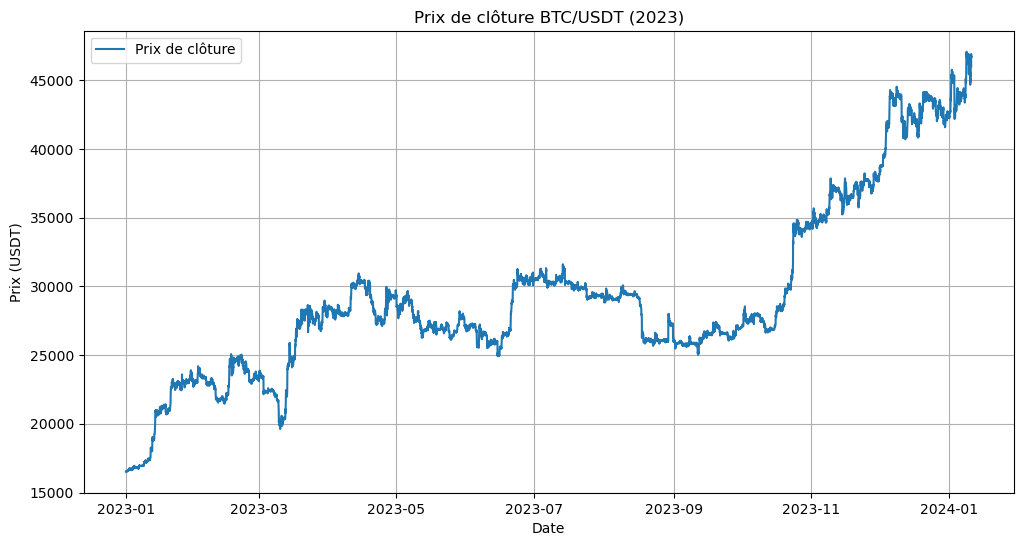

In [3]:
import matplotlib.pyplot as plt

# Graphique simple des prix de clôture
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Prix de clôture')
plt.title("Prix de clôture BTC/USDT (2023)")
plt.xlabel("Date")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.grid()
plt.show()


In [4]:
# Afficher un aperçu des 10 premières et 10 dernières lignes
def display_head_tail(df, head=10, tail=10):
    return pd.concat([df.head(head), df.tail(tail)])

# Aperçu
reduced_df = display_head_tail(df)
print(reduced_df)


               timestamp      open      high       low     close       volume  \
0    2023-01-01 00:00:00  16541.77  16545.70  16508.39  16529.67   4364.83570   
1    2023-01-01 01:00:00  16529.59  16556.80  16525.78  16551.47   3590.06669   
2    2023-01-01 02:00:00  16551.47  16559.77  16538.14  16548.19   3318.84038   
3    2023-01-01 03:00:00  16548.19  16548.19  16518.21  16533.04   4242.08050   
4    2023-01-01 04:00:00  16533.04  16535.97  16511.92  16521.85   4285.00909   
5    2023-01-01 05:00:00  16522.22  16534.98  16512.30  16530.71   3717.37178   
6    2023-01-01 06:00:00  16530.71  16550.00  16528.81  16539.79   3344.90206   
7    2023-01-01 07:00:00  16539.79  16544.57  16499.01  16526.19   5184.95822   
8    2023-01-01 08:00:00  16525.70  16534.03  16508.45  16513.34   4271.92023   
9    2023-01-01 09:00:00  16513.33  16542.49  16505.20  16537.88   4100.75049   
8990 2024-01-10 15:00:00  44884.01  45630.70  44800.00  45546.40   4166.81930   
8991 2024-01-10 16:00:00  45

In [5]:
import pandas as pd

# Fonction pour styliser et afficher un tableau esthétique des 10 premières et 10 dernières lignes
def styled_head_tail(df, head=10, tail=10):
    # Combiner les 10 premières et 10 dernières lignes
    reduced_df = pd.concat([df.head(head), df.tail(tail)])
    
    # Appliquer un style
    styled_df = reduced_df.style.set_caption("Aperçu des 10 premières et 10 dernières lignes") \
        .background_gradient(subset=['close'], cmap='viridis') \
        .format({
            'open': '{:,.2f}',
            'high': '{:,.2f}',
            'low': '{:,.2f}',
            'close': '{:,.2f}',
            'volume': '{:,.0f}'
        }) \
        .highlight_max(subset=['high'], color='lightgreen') \
        .highlight_min(subset=['low'], color='lightcoral')
    
    return styled_df

styled_head_tail(df)


,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-01-01 00:00:00,"16,541.77","16,545.70","16,508.39","16,529.67","4,365",1672534799999,72146293.586723,149854,2179.947720,36032352.870357,0
1,2023-01-01 01:00:00,"16,529.59","16,556.80","16,525.78","16,551.47","3,590",1672538399999,59376757.344609,126556,1730.249010,28617416.004864,0
2,2023-01-01 02:00:00,"16,551.47","16,559.77","16,538.14","16,548.19","3,319",1672541999999,54919453.375621,115398,1611.123020,26660867.867736,0
3,2023-01-01 03:00:00,"16,548.19","16,548.19","16,518.21","16,533.04","4,242",1672545599999,70122541.937454,137724,2096.092870,34649044.485130,0
4,2023-01-01 04:00:00,"16,533.04","16,535.97","16,511.92","16,521.85","4,285",1672549199999,70802644.478145,129535,2188.401750,36159818.024071,0
5,2023-01-01 05:00:00,"16,522.22","16,534.98","16,512.30","16,530.71","3,717",1672552799999,61412217.127378,118541,1925.655830,31812891.585456,0
6,2023-01-01 06:00:00,"16,530.71","16,550.00","16,528.81","16,539.79","3,345",1672556399999,55329560.653451,106074,1625.161790,26882457.057641,0
7,2023-01-01 07:00:00,"16,539.79","16,544.57","16,499.01","16,526.19","5,185",1672559999999,85663591.929699,148545,2476.590150,40917573.365295,0
8,2023-01-01 08:00:00,"16,525.70","16,534.03","16,508.45","16,513.34","4,272",1672563599999,70568383.457783,135605,2092.402700,34565020.094014,0
9,2023-01-01 09:00:00,"16,513.33","16,542.49","16,505.20","16,537.88","4,101",1672567199999,67754195.982209,134070,2103.341390,34752675.689757,0


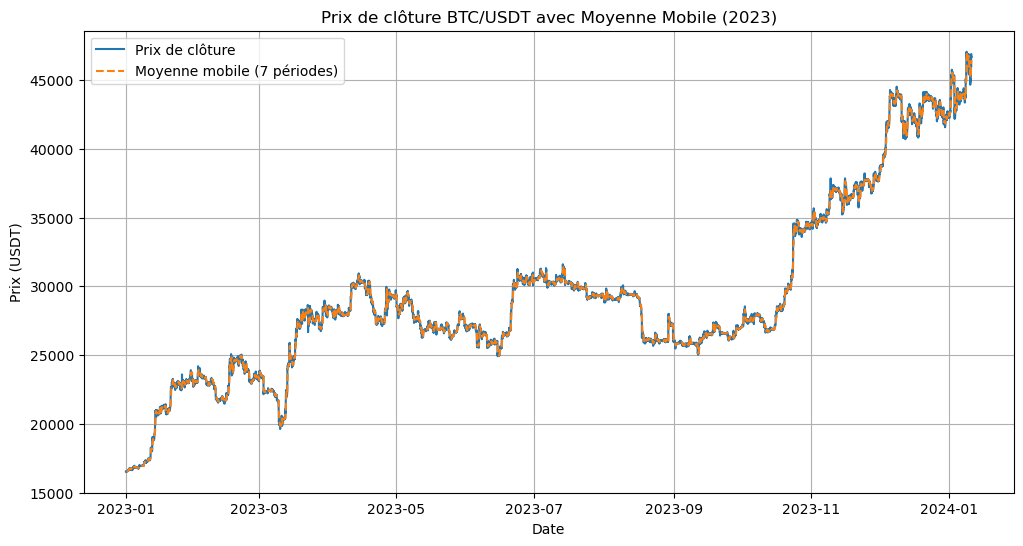

In [6]:
# Ajouter une moyenne mobile sur 7 jours
df['SMA_7'] = df['close'].rolling(window=7).mean()

# Graphique avec SMA
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Prix de clôture')
plt.plot(df['timestamp'], df['SMA_7'], label='Moyenne mobile (7 périodes)', linestyle='--')
plt.title("Prix de clôture BTC/USDT avec Moyenne Mobile (2023)")
plt.xlabel("Date")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.grid()
plt.show()



In [7]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=cf9fef9fd3f0a8dda470493f957dcc282c3033d65af04190847770fd636cbf69
  Stored in directory: /home/onyxia/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


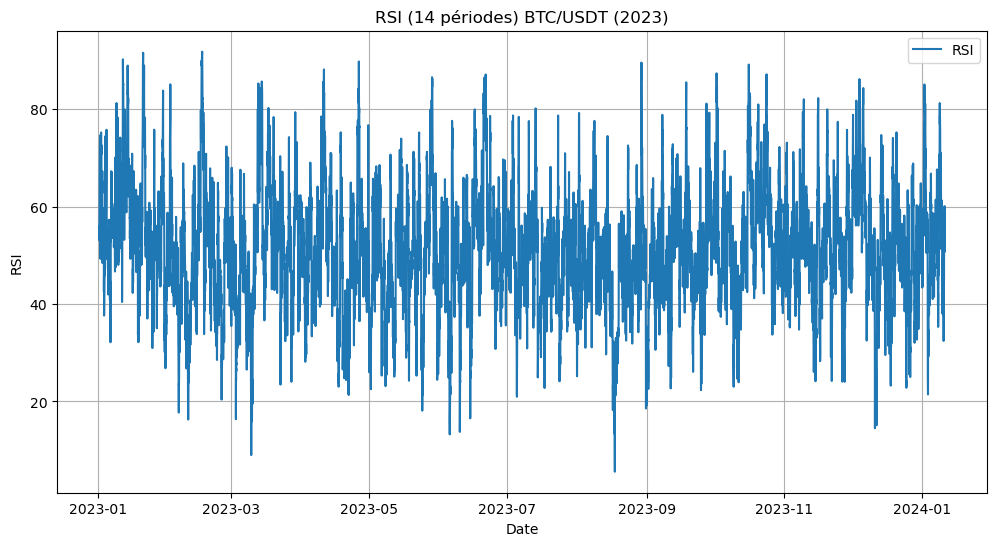

In [8]:
from ta.momentum import RSIIndicator

# Calculer le RSI
rsi = RSIIndicator(close=df['close'], window=14)
df['RSI'] = rsi.rsi()

# Visualisation RSI
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['RSI'], label='RSI')
plt.title("RSI (14 périodes) BTC/USDT (2023)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid()
plt.show()


In [9]:
import pandas as pd
from ta.momentum import RSIIndicator
from ta.volatility import AverageTrueRange
from ta.trend import MACD, EMAIndicator


df.set_index('timestamp', inplace=True)

# Ajouter EMA (Exponential Moving Average)
ema = EMAIndicator(close=df['close'], window=14)
df['EMA_14'] = ema.ema_indicator()

# Ajouter RSI (Relative Strength Index)
rsi = RSIIndicator(close=df['close'], window=14)
df['RSI_14'] = rsi.rsi()

# Ajouter ATR (Average True Range)
atr = AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=14)
df['ATR_14'] = atr.average_true_range()

# Ajouter MACD (Moving Average Convergence Divergence)
macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['Signal_Line'] = macd.macd_signal()

# Fonction pour styliser et afficher les 10 premières et 10 dernières lignes
def styled_head_tail_with_indicators(df, head=10, tail=10):
    # Combiner les 10 premières et 10 dernières lignes
    reduced_df = pd.concat([df.head(head), df.tail(tail)])
    
    # Styliser le tableau
    styled_df = reduced_df.style.set_caption("Aperçu des 10 Premières et 10 Dernières Lignes avec Indicateurs") \
        .background_gradient(subset=['close', 'EMA_14', 'RSI_14', 'ATR_14', 'MACD'], cmap='viridis') \
        .format({
            'open': '{:,.2f}',
            'high': '{:,.2f}',
            'low': '{:,.2f}',
            'close': '{:,.2f}',
            'volume': '{:,.0f}',
            'EMA_14': '{:,.2f}',
            'RSI_14': '{:,.2f}',
            'ATR_14': '{:,.2f}',
            'MACD': '{:,.2f}',
            'Signal_Line': '{:,.2f}'
        }) \
        .highlight_max(subset=['high'], color='lightgreen') \
        .highlight_min(subset=['low'], color='lightcoral')
    
    return styled_df

# Appliquer la fonction au DataFrame
styled_table_with_indicators = styled_head_tail_with_indicators(df)

# Afficher le tableau stylisé
styled_table_with_indicators


,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,SMA_7,RSI,EMA_14,RSI_14,ATR_14,MACD,Signal_Line
timestamp,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,"16,541.77","16,545.70","16,508.39","16,529.67","4,365",1672534799999,72146293.586723,149854,2179.947720,36032352.870357,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 01:00:00,"16,529.59","16,556.80","16,525.78","16,551.47","3,590",1672538399999,59376757.344609,126556,1730.249010,28617416.004864,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 02:00:00,"16,551.47","16,559.77","16,538.14","16,548.19","3,319",1672541999999,54919453.375621,115398,1611.123020,26660867.867736,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 03:00:00,"16,548.19","16,548.19","16,518.21","16,533.04","4,242",1672545599999,70122541.937454,137724,2096.092870,34649044.485130,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 04:00:00,"16,533.04","16,535.97","16,511.92","16,521.85","4,285",1672549199999,70802644.478145,129535,2188.401750,36159818.024071,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 05:00:00,"16,522.22","16,534.98","16,512.30","16,530.71","3,717",1672552799999,61412217.127378,118541,1925.655830,31812891.585456,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 06:00:00,"16,530.71","16,550.00","16,528.81","16,539.79","3,345",1672556399999,55329560.653451,106074,1625.161790,26882457.057641,0,16536.388571,nan,nan,nan,0.00,nan,nan
2023-01-01 07:00:00,"16,539.79","16,544.57","16,499.01","16,526.19","5,185",1672559999999,85663591.929699,148545,2476.590150,40917573.365295,0,16535.891429,nan,nan,nan,0.00,nan,nan
2023-01-01 08:00:00,"16,525.70","16,534.03","16,508.45","16,513.34","4,272",1672563599999,70568383.457783,135605,2092.402700,34565020.094014,0,16530.444286,nan,nan,nan,0.00,nan,nan
